In [141]:
%pylab inline
class Diputado(object):
    def __init__(self,ind,fileRoot="./"):
        self.name=""
        self.surname=""
        self.ind=ind
        self.picfile=""
        self.party=""
        self.gender=""
        self.fileRoot=fileRoot
        self.ext="c.jpg" 
    def setName(self,name):
        self.name=name
    def setSurname(self,surname):
        self.surname=surname
    def setParty(self,party):
        self.party=party
    def setGender(self,gender):
        self.gender=gender
    def getName(self):
        return self.name
    def getSurname(self):
        return self.surname
    def getInd(self):
        return self.ind
    def getPicfile(self):
        return self.fileRoot + str(self.ind) + self.ext
    def getParty(self):
        return self.party
    def getGender(self):
        return self.gender

Populating the interactive namespace from numpy and matplotlib


/home/acmankit/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'axes', 'clf', 'imag', 'mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [142]:
class Parlament(object):
    def __init__(self):
        self.elements=[]
        self.inds=[]
        self.ndips=0
    def add(self, diputado):
        self.elements.append(diputado)
        self.inds.append(diputado.getInd())
        self.ndips +=1
    def getInds(self):
        return [self.elements[i].getInd() for i in range(self.ndips)]
    def len(self):
        return len(self.elements)
    def __getitem__(self, key):
        if isinstance(key, slice):
            indices = key.indices(self.ndips)
            return [self[ii] for ii in xrange(*key.indices(self.len()))] 
        else:
            return self.elements[key]
    def getName(self,key):
        return self.elements[key].getName()
        

In [143]:
import csv
with open('mesio_index.csv','rb') as csvfile:
    r = csv.reader(csvfile, delimiter=';')
    r.next()
    p = Parlament()
    for row in r:
        n = Diputado(int(row[0]),"MESIO/")
        n.setName(row[1].strip())
        n.setSurname(row[2].strip())
        n.setGender(row[3].strip())
        n.setParty(row[4].strip())
        p.add(n)


In [144]:
p.len()
p[19].getPicfile()

'MESIO/20c.jpg'

/home/acmankit/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.


'Alvaro|Cortes|H'

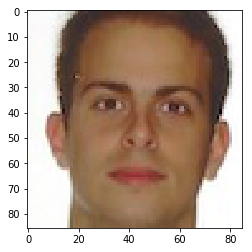

In [145]:
from scipy import ndimage,misc
import numpy as np
import matplotlib.pyplot as pl
I = ndimage.imread(p[1].getPicfile())
pl.imshow(I)
np.shape(I)
'|'.join([p[1].getName(), p[1].getSurname(), p[1].getGender()])

/home/acmankit/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


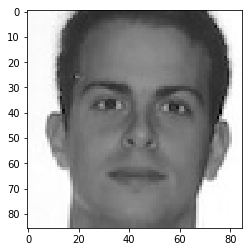

In [146]:
I = ndimage.imread(p[1].getPicfile(), flatten=1)
img=pl.imshow(I)
img.set_cmap('gray')
Is=shape(I)


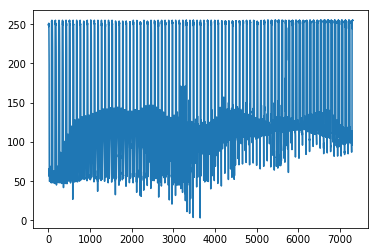

In [147]:
Iv = np.reshape(I,np.prod(Is))
pl.plot(Iv)

In [148]:
X=np.array([ np.reshape(ndimage.imread(p[i].getPicfile(), flatten=1), np.prod(Is)) 
             for i in range(0,p.len())])
shape(X)
Yg=np.array([ p[i].getGender() for i in range(0,p.len())])
Yp=np.array([ p[i].getParty() for i in range(0,p.len())])
Yp[0:5],Yg[0:5],shape(X)

/home/acmankit/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


(array(['MESIO', 'MESIO', 'MESIO', 'MESIO', 'MESIO'], dtype='|S5'),
 array(['M', 'H', 'M', 'H', 'M'], dtype='|S1'),
 (20, 7310))

## Principal Component Analysis

In [149]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
sX = preprocessing.scale(X)
ncomp=5
mod=PCA(n_components=ncomp)
mod.fit(sX)
ev = mod.explained_variance_ratio_
print(ev)

[0.3023468  0.15939549 0.08566716 0.08491539 0.06465607]


In [150]:
Xpca = mod.transform(sX)
Xpca[0:3,:]

array([[ 14.749744 ,  79.00534  ,  77.701775 , -31.162182 ,   9.007625 ],
       [  2.463964 , -41.83389  ,  16.867092 ,   3.2292428, -20.220432 ],
       [  4.5217986, -21.455742 , -12.992904 , -42.5869   ,   6.5209866]],
      dtype=float32)

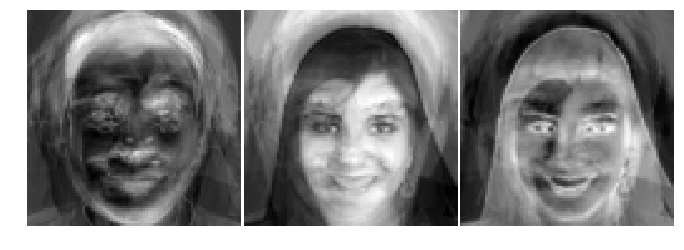

In [151]:
eigendips = mod.components_.reshape((ncomp, Is[0], Is[1]))

pl.figure(figsize=(9 ,3))

pl.subplot(131)
pl.imshow(eigendips[0], cmap=pl.cm.gray)
pl.axis('off')

pl.subplot(132)
pl.imshow(eigendips[1], cmap=pl.cm.gray)
pl.axis('off')

pl.subplot(133)
pl.imshow(-eigendips[2], cmap=pl.cm.gray)
pl.axis('off')

pl.subplots_adjust(wspace=0.01, hspace=0.01, top=1, bottom=0, left=0, right=1)
pl.show()

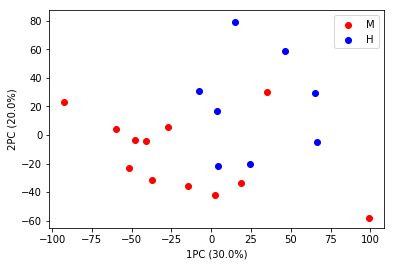

In [152]:
colors=['blue','red']
clut = dict(zip(['M','H'],['red','blue']))
""" for one shot plot cols=[ clut[i] for i in Yg]"""

pl.scatter(Xpca[np.where(Yg=='H'),0],Xpca[np.where(Yg=='H'),1],c='red')
pl.scatter(Xpca[np.where(Yg=='M'),0],Xpca[np.where(Yg=='M'),1],c='blue')
pl.legend(('M','H'))
pl.xlabel('1PC ('+ "%s" % float( "%2.1g" % (100*ev[0])) +"%)")
pl.ylabel('2PC ('+ "%s" % float( "%2.1g" % (100*ev[1])) +"%)")
pl.show()

/home/acmankit/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/acmankit/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/acmankit/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/acmankit/anaconda3/envs/py27/lib/

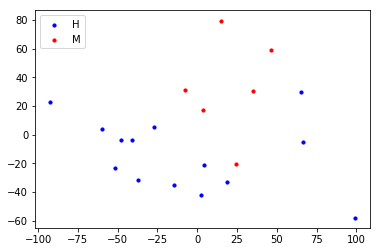

In [153]:
# Performing Gaussian Mixture Based Clustering
from sklearn.mixture import GMM
gmm = GMM(n_components=2).fit(Xpca)
labels = gmm.predict(Xpca)

import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(Xpca[np.where(labels==0),0],Xpca[np.where(labels==0),1], s=10, c='blue', marker="o", label='H')
axes.scatter(Xpca[np.where(labels==1),0],Xpca[np.where(labels==1),1], 
             s=10, c='red', marker="o", label='M')

plt.legend(loc='upper left');


In [154]:
probs = gmm.predict_proba(Xpca)
print(probs[:5].round(3))

[[0.    1.   ]
 [0.927 0.073]
 [0.921 0.079]
 [0.995 0.005]
 [0.034 0.966]]


/home/acmankit/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


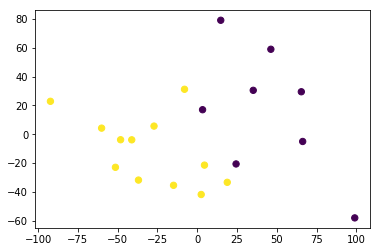

In [155]:
from sklearn import cluster

k_means =  cluster.KMeans(n_clusters=2,n_init=10)
k_means.fit(Xpca)
labels = k_means.predict(Xpca)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=labels, s=40, cmap='viridis');


In [156]:
labels

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0],
      dtype=int32)

In [157]:
Yp

array(['MESIO', 'MESIO', 'MESIO', 'MESIO', 'MESIO', 'MESIO', 'MESIO',
       'MESIO', 'MESIO', 'MESIO', 'MESIO', 'MESIO', 'MESIO', 'MESIO',
       'MESIO', 'MESIO', 'MESIO', 'MESIO', 'MESIO', 'MESIO'], dtype='|S5')

In [158]:

def plotg(g):
    indg = np.where(k_means.labels_ == g)
    nx = int(sqrt(shape(indg)[1]))+1
    ny = nx+1
    f = pl.figure()

    for e,i in enumerate(indg[0]):
        f.add_subplot(ny,nx,e+1)
        pl.imshow(X[i,:].reshape(Is), cmap=pl.cm.gray)
        pl.axis('off')
        pl.subplots_adjust(wspace=0, hspace=0,top=1, bottom=0, left=0, right=1)


[0 1]


(None, None)

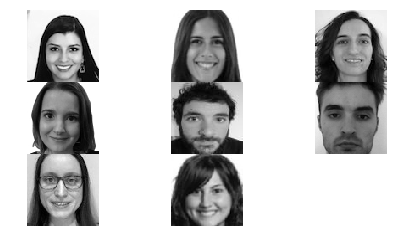

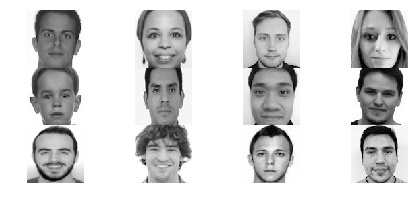

In [159]:
print(unique(k_means.labels_))
plotg(0), plotg(1)


Now we will make an attempt to differentiate between the Members of Chamber of Repreentatives and the Members of Master's in Statistics and Operations Research Class. In that procedure, our first approach towards the problem is to visualize the already clustered data into a scatterplot and see if they are 

Now we will be reading the image data of the member of the chamber of representatives and use that data for training our classification algorithms to predict the genders of the members of the Master's class MESIO.


In [160]:

import csv
with open('index.csv','rb') as csvfile:
    mcr = csv.reader(csvfile, delimiter=';')
    mcr.next()
    politicians = Parlament()
    for row in mcr:
        n = Diputado(int(row[0]),"db/")
        n.setName(row[1].strip())
        n.setSurname(row[2].strip())
        n.setGender(row[3].strip())
        n.setParty(row[4].strip())
        politicians.add(n)


/home/acmankit/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/home/acmankit/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':


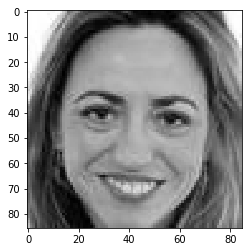

In [161]:
from scipy import ndimage,misc
import numpy as np
import matplotlib.pyplot as pl
photo = ndimage.imread(politicians[1].getPicfile())
pl.imshow(photo)
np.shape(photo)
'|'.join([politicians[1].getName(), politicians[1].getSurname(), politicians[1].getGender()])

photo = ndimage.imread(politicians[1].getPicfile(), flatten=1)
imag=pl.imshow(photo)
imag.set_cmap('gray')
photo_shape=shape(photo)


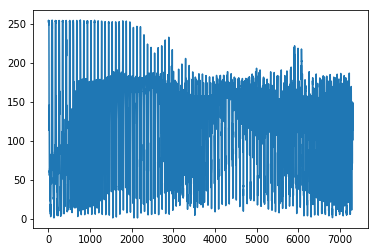

In [162]:
photo_v = np.reshape(photo,np.prod(photo_shape))
pl.plot(photo_v)

In [163]:
train=np.array([ np.reshape(ndimage.imread(politicians[i].getPicfile(), flatten=1), np.prod(photo_shape)) 
            for i in range(0,politicians.len())])
shape(train)
train_gender = np.array([ politicians[i].getGender() for i in range(0,politicians.len())])
train_party = np.array([ politicians[i].getParty() for i in range(0,politicians.len())])
train_party[0:5],train_gender[0:5],shape(train)

/home/acmankit/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


(array(['GS', 'GS', 'GC-CiU', 'GP', 'GP'], dtype='|S10'),
 array(['H', 'M', 'H', 'H', 'H'], dtype='|S1'),
 (348, 7310))

In [164]:
# Computing the Principal Components for simplification in classification
train_scale = preprocessing.scale(train)
ncomp=5
princomp_model = PCA(n_components=ncomp)
princomp_model.fit(train_scale)
ev = princomp_model.explained_variance_ratio_
print(ev)



[0.21534543 0.08868027 0.07253817 0.05253206 0.04563522]


In [165]:
train_pca = princomp_model.transform(train_scale)
train_pca[0:3,:]

array([[-35.67605   ,   2.6091168 ,  13.036006  ,  -7.5263205 ,
        -10.67437   ],
       [ 55.10819   ,  19.368484  , -26.933657  ,  21.88769   ,
         -6.6812882 ],
       [-36.2989    ,   0.79693073,  -9.57593   ,  20.488829  ,
         -3.4114192 ]], dtype=float32)

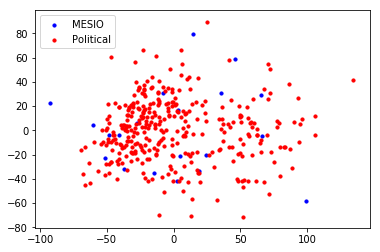

In [166]:
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(Xpca[:,0],Xpca[:,1], s=10, c='blue', marker="o", label='MESIO')
axes.scatter(train_pca[:,0],train_pca[:,1], 
             s=10, c='red', marker="o", label='Political')

plt.legend(loc='upper left');
plt.show()

 We can plot the images of both the dataset together and observe if there is a great deal of similarity between the two datasets. If there is a lack of similarity, then this will correspond to the bias originating from the two datasets which will imply that they are so different that they're having a different origin maybe

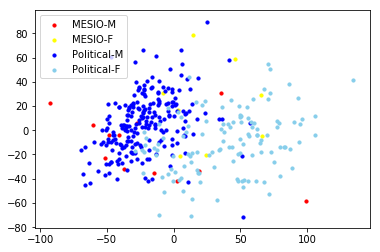

In [167]:
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(Xpca[np.where(Yg=='H'),0],Xpca[np.where(Yg=='H'),1], s=10, c='red', marker="o", label='MESIO-M')
axes.scatter(Xpca[np.where(Yg=='M'),0],Xpca[np.where(Yg=='M'),1], s=10, c='yellow', marker="o", label='MESIO-F')

axes.scatter(train_pca[np.where(train_gender=='H'),0],train_pca[np.where(train_gender=='H'),1], 
             s=10, c='blue', marker="o", label='Political-M')
axes.scatter(train_pca[np.where(train_gender=='M'),0],train_pca[np.where(train_gender=='M'),1], 
             s=10, c='skyblue', marker="o", label='Political-F')

plt.legend(loc='upper left');
plt.show()

However, as we observe from the imagery above, we can see that the two datasets almost mingled between each other and this suggests the presence of similar center for both the datasets. Also, they seem to have almost similar variance. One reason attributed to this is the scaling of the two datasets prior to applying any algorithm. Probably, even if the datasets were on different scales, then they were scaled after explicit scaling. The presence of slight spread in the dataset of MESIO members is considered to be due to the lack of significant number of observations. 

In [168]:
train_label = np.array([ int(t=='H') for t in train_gender])
print train_label[0:10]

[1 0 1 1 1 0 0 1 0 1]


In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
k_fold = cross_validation.KFold(n=politicians.len(), n_folds=5)
scores = list()
for train_indices, test_indices in k_fold:
    train_x = train[train_indices,:]
    train_y = train_label[train_indices]
    validate_x = train[test_indices,:]
    validate_y = train_label[test_indices]
    knn = KNeighborsClassifier()
    knn.fit(train_x,train_y)
    scores.append(knn.score(validate_x,validate_y))
    
print scores

[0.8714285714285714, 0.8428571428571429, 0.8857142857142857, 0.8840579710144928, 0.9420289855072463]


In [170]:
test_y = np.array([ int(t=='H') for t in Yg])

In [171]:
from sklearn.metrics import classification_report
ypred = knn.predict(X)
ytest = test_y
print classification_report(ytest, ypred, target_names=['H','M'])


             precision    recall  f1-score   support

          H       0.67      0.75      0.71         8
          M       0.82      0.75      0.78        12

avg / total       0.76      0.75      0.75        20



In [172]:
# Support Vector Classification
test_y
train

array([[252.451, 252.821, 245.099, ..., 255.   , 255.   , 255.   ],
       [252.907, 253.804, 254.701, ..., 148.861, 113.872, 115.872],
       [252.309, 251.722, 252.331, ..., 255.   , 255.   , 255.   ],
       ...,
       [235.86 , 236.86 , 236.871, ..., 217.77 , 215.058, 219.748],
       [242.   , 242.   , 242.   , ..., 216.039, 217.039, 219.039],
       [252.337, 252.636, 252.935, ..., 253.   , 254.   , 254.   ]],
      dtype=float32)

In [173]:
from sklearn import svm
svc_poly = svm.SVC(C=1, kernel='poly')
[svc_poly.fit(train[training,:], train_label[training]).score(train[testing,:], train_label[testing]) 
    for training, testing in k_fold]

[0.8857142857142857,
 0.8714285714285714,
 0.9285714285714286,
 0.8985507246376812,
 0.9130434782608695]

In [174]:
svc_linear = svm.SVC(C=1, kernel='linear')
[svc_linear.fit(train[training,:], train_label[training]).score(train[testing,:], train_label[testing]) 
    for training, testing in k_fold]

[0.8857142857142857,
 0.8714285714285714,
 0.9142857142857143,
 0.9130434782608695,
 0.8840579710144928]

In [175]:
k_fold_class_balanced = cross_validation.StratifiedKFold(train_label,n_folds=10)
svc = svm.SVC(C=1, kernel='poly')
[svc_poly.fit(train[training,:], train_label[training]).score(train[testing,:], train_label[testing]) 
    for training, testing in k_fold_class_balanced]

[0.9166666666666666,
 0.8611111111111112,
 0.8888888888888888,
 0.8857142857142857,
 1.0,
 0.9705882352941176,
 0.8529411764705882,
 0.9411764705882353,
 0.8823529411764706,
 0.9705882352941176]

In [176]:
from sklearn.grid_search import GridSearchCV
gammas = np.logspace(-6, -1, 5)
clf = GridSearchCV(estimator=svc_poly, param_grid=dict(gamma=gammas), n_jobs=-1)
clf.fit(train[training,:], train_label[training]) 
print clf.best_score_
print clf.best_estimator_.gamma
print clf.score(train[testing,:], train_label[testing])

0.891719745223
1e-06
0.9705882352941176


In [177]:
from sklearn.metrics import classification_report
ypred = clf.predict(X)
ytest = test_y
print classification_report(ytest, ypred, target_names=['H','M'])

             precision    recall  f1-score   support

          H       0.55      0.75      0.63         8
          M       0.78      0.58      0.67        12

avg / total       0.68      0.65      0.65        20



In [178]:
train_pca

array([[-35.67605   ,   2.6091168 ,  13.036006  ,  -7.5263205 ,
        -10.67437   ],
       [ 55.10819   ,  19.368484  , -26.933657  ,  21.88769   ,
         -6.6812882 ],
       [-36.2989    ,   0.79693073,  -9.57593   ,  20.488829  ,
         -3.4114192 ],
       ...,
       [ 36.891594  ,  -8.537808  , -32.300594  ,  20.177204  ,
         21.737093  ],
       [ 49.956226  , -19.038021  , -16.338385  ,  36.80357   ,
          1.6811842 ],
       [-19.507471  , -42.08612   , -18.506905  ,  -9.810151  ,
         -2.8240469 ]], dtype=float32)

# Differentiating between a classmate and a Member of Chamber of Representatives

In our approach here, we have examined first by plotting the original data of the MESIO and Political classes. Thereafter, we have made an attempt to examine the data of the Principal Components of the two.

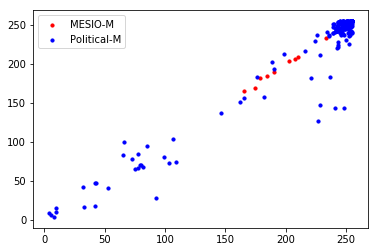

In [179]:
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(X[:,0],X[:,1], s=10, c='red', marker="o", label='MESIO-M')
axes.scatter(train[:,0],train[:,1], 
             s=10, c='blue', marker="o", label='Political-M')

plt.legend(loc='upper left');
plt.show()

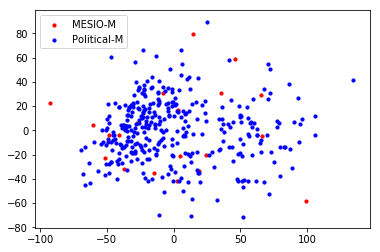

In [180]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(Xpca[:,0],Xpca[:,1], s=10, c='red', marker="o", label='MESIO-M')
axes.scatter(train_pca[:,0],train_pca[:,1], 
             s=10, c='blue', marker="o", label='Political-M')

plt.legend(loc='upper left');
plt.show()

Observe that, it is indeed very difficult to differentiate between the two different classes of data. Also, we did not consider any classification technque because the only attribute that significantly differentiaties the people of two classes is based on the attribute of their political affiliation. However, the political affiliation in the case of training data were all different and the test case is significantly different which makes impossible for a classification algorithm to generalize. Finally, we decided to consider clustering the entire data and we used the K-Means clustering algorithm. Below, we have plotted the whole dataset based on the different colors corresponding to different political affiliations.

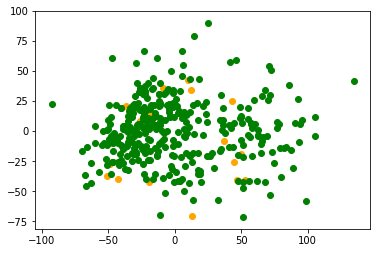

In [233]:
clustering_dataset = np.append(Xpca, train_pca)
clustering_dataset = np.reshape(clustering_dataset, (368,5))

clustering_label = np.append( test_y,train_label)

Yp=np.array([ p[i].getParty() for i in range(0,p.len())])
Zp=np.array([ politicians[i].getParty() for i in range(0, politicians.len()) ])
party_affiliation = np.append(Zp, Yp)

plt.scatter(clustering_dataset[np.where(party_affiliation=='MESIO'),0], 
            clustering_dataset[np.where(party_affiliation=='MESIO'),1], c="orange")

plt.scatter(clustering_dataset[np.where(party_affiliation!='MESIO'),0],
            clustering_dataset[np.where(party_affiliation!='MESIO'),1], c="green")

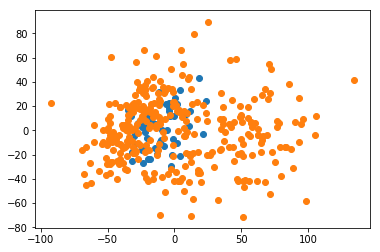

In [232]:
from sklearn import cluster

k_means =  cluster.KMeans(n_clusters=9)
k_means.fit(clustering_dataset)
labels = k_means.labels_

#scatter(clustering_dataset[:,0],clustering_dataset[:,1],c=k_means.labels_.astype(np.float))
plt.scatter(clustering_dataset[np.where(labels==3),0], 
            clustering_dataset[np.where(labels==3),1])

plt.scatter(clustering_dataset[np.where(labels!=3),0],
            clustering_dataset[np.where(labels!=3),1])